Visualize the trend with pandas rolling statistics

In today’s issue, I’m going to show you how to apply rolling statistics to stock prices with pandas.

“Rolling” a statistic applies a calculation to a chunk of data, slides (or rolls) the chunk forward, and does it again. It’s how all technical analysis calculations are done.

Learning how to apply rolling statistics unlocks the power of pandas:

Identify outliers
Visualize trends
Apply predictive measures

In [1]:
%matplotlib inline

import yfinance as yf
# Let’s get some data.

data = yf.download("NFLX", start="2020-01-01", end="2022-06-30")

[*********************100%***********************]  1 of 1 completed


Step 2: Define the function for z-score

The z-score is the number of standard deviations a value is away from it’s mean. It’s a great way to summarize where a value lies on a distribution.

For example, if you’re 189 cm tall, the z-score of your height might be 2.5. That means you are 2.5 standard deviations away from the mean height of everyone in the distribution.

The math is simple:

(value – average value) / standard deviation of values

Here’s what it looks like in Python.

In [2]:
def z_score(chunk):
    return (chunk[-1] - chunk.mean()) / chunk.std()
# The [-1] means “take the last value from the chunk”.

<AxesSubplot:xlabel='Date'>

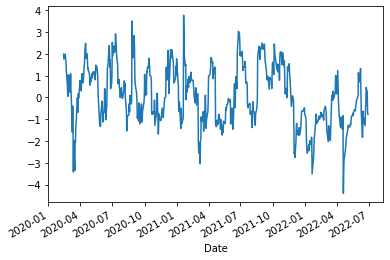

In [6]:
# Creating the rolling z-score is one line of code using pandas.
rolled = data.Close.rolling(window=30).apply(z_score)
rolled.plot()

<AxesSubplot:>

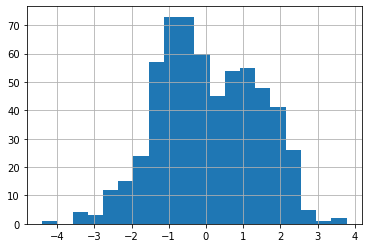

In [7]:
rolled.hist(bins=20)

<AxesSubplot:xlabel='Date'>

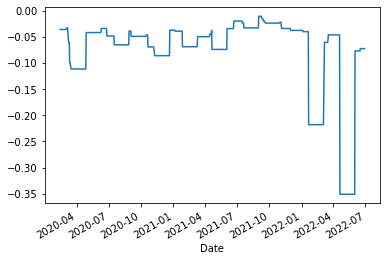

In [8]:
# Let’s take a look at the largest percentage drop over a rolling 30-day period.

min_pct_change = (
    data
    .Close
    .pct_change()
    .rolling(window=30)
    .min()
)
min_pct_change.plot()

<AxesSubplot:>

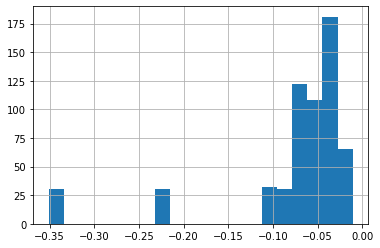

In [10]:
min_pct_change.hist(bins=20)